In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **Read Data**

In [ ]:
data = pd.read_csv('Employee-salary-prediction.csv')
data.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [ ]:
data.shape

(375, 6)

In [ ]:
#Rename Columns
data.columns = ['Age', 'Gender', 'Degree', 'Job_Title', 'Experience_years', 'Salary']
data.columns

Index(['Age', 'Gender', 'Degree', 'Job_Title', 'Experience_years', 'Salary'], dtype='object')

In [ ]:
#Recall data yang telah di rename
data.head()

,Age,Gender,Degree,Job_Title,Experience_years,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               373 non-null    float64
 1   Gender            373 non-null    object 
 2   Degree            373 non-null    object 
 3   Job_Title         373 non-null    object 
 4   Experience_years  373 non-null    float64
 5   Salary            373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


## **Data Preprocessing**

In [ ]:
# Mengecek data duplicate
data.duplicated().sum()

50

In [ ]:
data[data.duplicated()]

,Age,Gender,Degree,Job_Title,Experience_years,Salary
195,28.0,Male,Bachelor's,Junior Business Analyst,2.0,40000.0
250,30.0,Female,Bachelor's,Junior Marketing Coordinator,2.0,40000.0
251,38.0,Male,Master's,Senior IT Consultant,9.0,110000.0
252,45.0,Female,PhD,Senior Product Designer,15.0,150000.0
253,28.0,Male,Bachelor's,Junior Business Development Associate,2.0,40000.0
254,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0,85000.0
255,44.0,Male,Bachelor's,Senior Software Engineer,14.0,130000.0
256,34.0,Female,Master's,Senior Financial Advisor,6.0,100000.0
257,35.0,Male,Bachelor's,Senior Project Coordinator,9.0,95000.0
258,50.0,Female,PhD,Director of Operations,22.0,180000.0


In [ ]:
# Menghapus data duplicate
data1 = data.drop_duplicates(keep = 'first')

In [ ]:
# Mengecek Missing Value
data1.isnull().sum()

Age                 1
Gender              1
Degree              1
Job_Title           1
Experience_years    1
Salary              1
dtype: int64

In [ ]:
# Menghapus Missing Value
data1.dropna(how = 'any', inplace = True)

<ipython-input-13-0fb3735e6c82>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1.dropna(how = 'any', inplace = True)


In [ ]:
#Melihat ukuran data setelah duplicate dan null value dihapus
data1.shape

(324, 6)

In [ ]:
#Menampilkan data setelah duplicate dan null value dihapus
data1.head()

,Age,Gender,Degree,Job_Title,Experience_years,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


## **Data Exploration and Visualization**

Statistics of numerical columns

In [ ]:
data1.describe()

,Age,Experience_years,Salary
count,324.000000,324.000000,324.000000
mean,37.382716,10.058642,99985.648148
std,7.185844,6.650470,48652.271440
min,23.000000,0.000000,350.000000
25%,31.000000,4.000000,55000.000000
50%,36.500000,9.000000,95000.000000
75%,44.000000,16.000000,140000.000000
max,53.000000,25.000000,250000.000000


In [ ]:
#Mengubah tipe data

data1['Age'] = data1['Age'].astype('int')
data1['Experience_years'] = data1['Experience_years'].astype('int')

<ipython-input-17-1a58bcfbe848>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['Age'] = data1['Age'].astype('int')
<ipython-input-17-1a58bcfbe848>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['Experience_years'] = data1['Experience_years'].astype('int')


In [ ]:
data1

,Age,Gender,Degree,Job_Title,Experience_years,Salary
0,32,Male,Bachelor's,Software Engineer,5,90000.0
1,28,Female,Master's,Data Analyst,3,65000.0
2,45,Male,PhD,Senior Manager,15,150000.0
3,36,Female,Bachelor's,Sales Associate,7,60000.0
4,52,Male,Master's,Director,20,200000.0
...,...,...,...,...,...,...
348,28,Female,Bachelor's,Junior Operations Manager,1,35000.0
349,36,Male,Bachelor's,Senior Business Development Manager,8,110000.0
350,44,Female,PhD,Senior Data Scientist,16,160000.0
351,31,Male,Bachelor's,Junior Marketing Coordinator,3,55000.0


In [ ]:
#Melihat distribusi Degree
data1['Degree'].value_counts()

Degree
Bachelor's    191
Master's       91
PhD            42
Name: count, dtype: int64

<Axes: xlabel='Degree'>

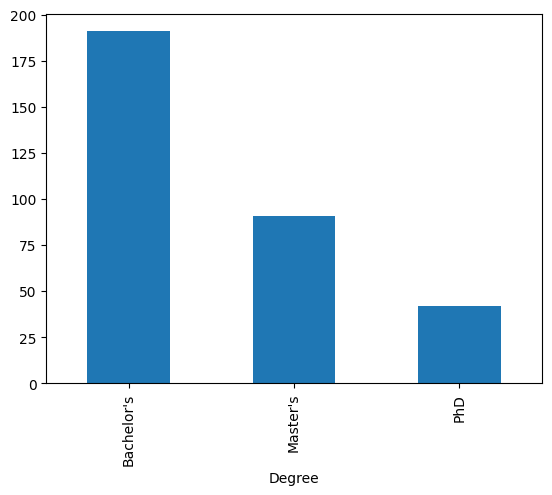

In [ ]:
#Visualisasi distribusi Degree
data1['Degree'].value_counts().plot(kind = 'bar')

In [ ]:
#Melihat distribusi Job Title
data1['Job_Title'].value_counts()

Job_Title
Director of Operations             9
Director of Marketing              8
Senior Marketing Manager           8
Senior Project Manager             7
Senior Business Analyst            6
                                  ..
Business Development Manager       1
Customer Service Representative    1
IT Manager                         1
Digital Marketing Manager          1
Junior Web Developer               1
Name: count, Length: 174, dtype: int64

In [ ]:
data1['Job_Title'].unique()

array(['Software Engineer', 'Data Analyst', 'Senior Manager',
       'Sales Associate', 'Director', 'Marketing Analyst',
       'Product Manager', 'Sales Manager', 'Marketing Coordinator',
       'Senior Scientist', 'Software Developer', 'HR Manager',
       'Financial Analyst', 'Project Manager', 'Customer Service Rep',
       'Operations Manager', 'Marketing Manager', 'Senior Engineer',
       'Data Entry Clerk', 'Sales Director', 'Business Analyst',
       'VP of Operations', 'IT Support', 'Recruiter', 'Financial Manager',
       'Social Media Specialist', 'Software Manager', 'Junior Developer',
       'Senior Consultant', 'Product Designer', 'CEO', 'Accountant',
       'Data Scientist', 'Marketing Specialist', 'Technical Writer',
       'HR Generalist', 'Project Engineer', 'Customer Success Rep',
       'Sales Executive', 'UX Designer', 'Operations Director',
       'Network Engineer', 'Administrative Assistant',
       'Strategy Consultant', 'Copywriter', 'Account Manager',
      

<Axes: xlabel='Gender'>

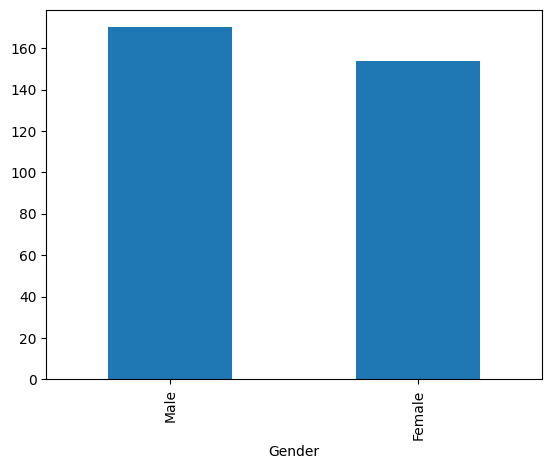

In [ ]:
#Visualisasi distribusi Gender
data1['Gender'].value_counts().plot(kind = 'bar')

### Numerical Variabel - Plot Histogram / Boxplot

<Axes: ylabel='Frequency'>

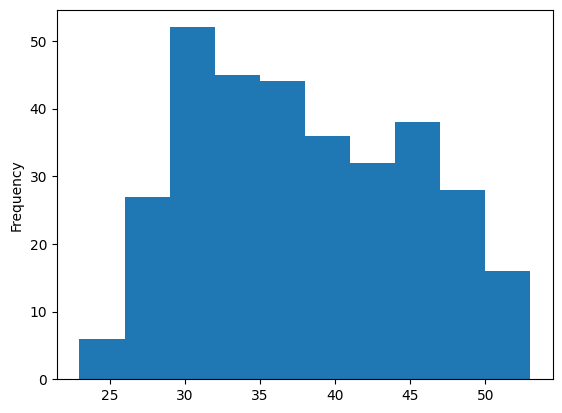

In [ ]:
data1.Age.plot(kind = 'hist')

<Axes: >

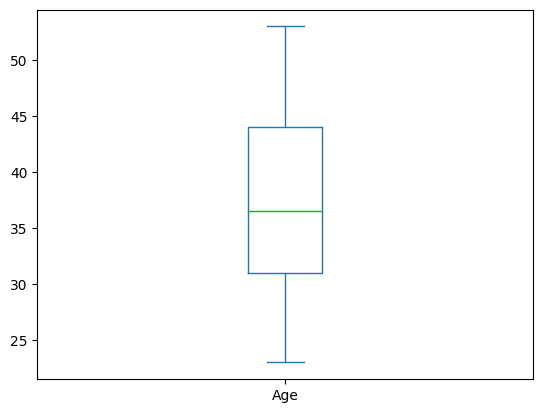

In [ ]:
data1.Age.plot(kind = 'box')

<Axes: ylabel='Frequency'>

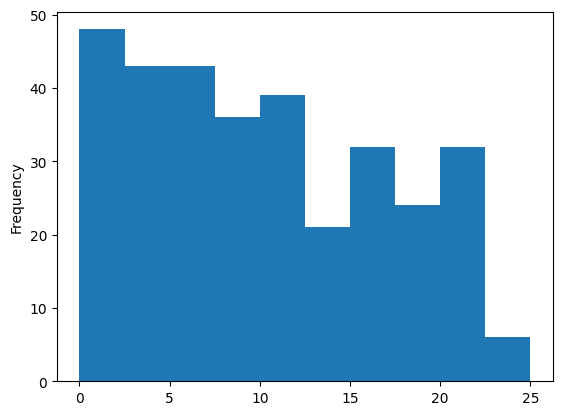

In [ ]:
data1.Experience_years.plot(kind = 'hist')

<Axes: >

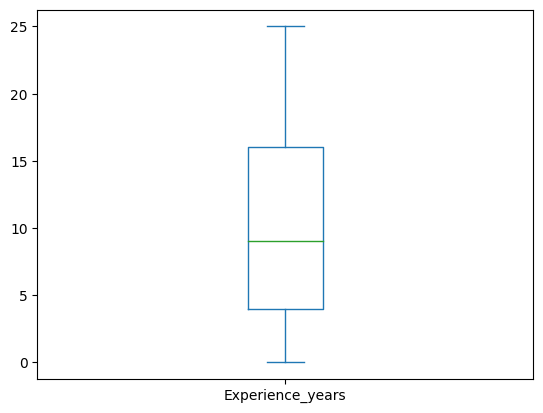

In [ ]:
data1.Experience_years.plot(kind = 'box')

<Axes: ylabel='Frequency'>

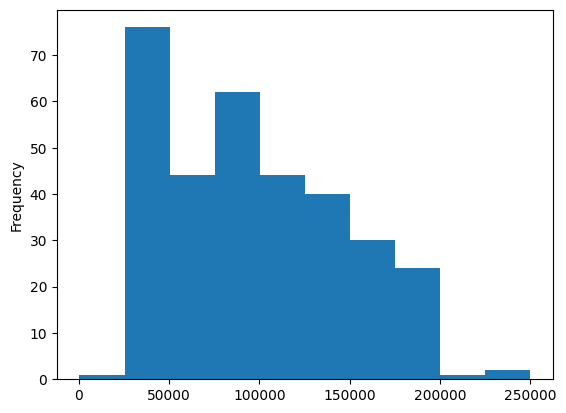

In [ ]:
data1.Salary.plot(kind = 'hist')

<Axes: >

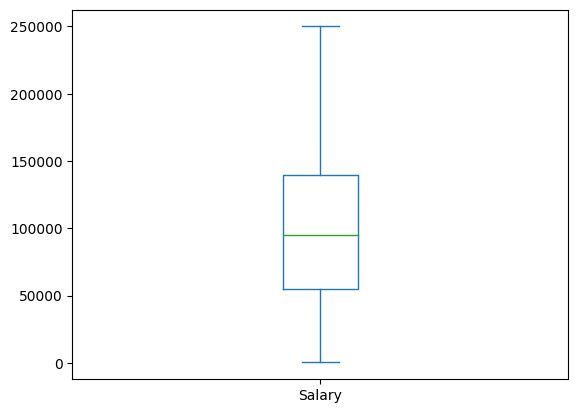

In [ ]:
data1.Salary.plot(kind = 'box')

## **Feature Engineering :**

### **Label Encoding**

Mengonversi data gender, gelar, dan jabatan menjadi numerik agar dapat dipahami oleh model

In [ ]:
from sklearn.preprocessing import LabelEncoder
Label_Encoder = LabelEncoder()

In [ ]:
data1['Gender_Encode'] = Label_Encoder.fit_transform(data1['Gender'])

<ipython-input-33-3e790f3a8085>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['Gender_Encode'] = Label_Encoder.fit_transform(data1['Gender'])


In [ ]:
data1['Degree_Encode'] = Label_Encoder.fit_transform(data1['Degree'])

<ipython-input-34-45fbc60a2151>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['Degree_Encode'] = Label_Encoder.fit_transform(data1['Degree'])


In [ ]:
data1['Job_Title_Encode'] = Label_Encoder.fit_transform(data1['Job_Title'])

<ipython-input-35-4ff242f1605e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['Job_Title_Encode'] = Label_Encoder.fit_transform(data1['Job_Title'])


### **Data after Label Encoding :**

In [ ]:
data1.head()

,Age,Gender,Degree,Job_Title,Experience_years,Salary,Gender_Encode,Degree_Encode,Job_Title_Encode
0,32,Male,Bachelor's,Software Engineer,5,90000.0,1,0,159
1,28,Female,Master's,Data Analyst,3,65000.0,0,1,17
2,45,Male,PhD,Senior Manager,15,150000.0,1,2,130
3,36,Female,Bachelor's,Sales Associate,7,60000.0,0,0,101
4,52,Male,Master's,Director,20,200000.0,1,1,22


### **Feature Scalling :**

Agar data memiliki skala yang sama sehingga tidak terjadi bias

In [ ]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()

In [ ]:
data1['Age_scaled'] = std_scaler.fit_transform(data1[['Age']])
data1[ 'Experience years_scaled'] = std_scaler.fit_transform(data1[['Experience_years']])

<ipython-input-40-6807a06865c9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['Age_scaled'] = std_scaler.fit_transform(data1[['Age']])
<ipython-input-40-6807a06865c9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1[ 'Experience years_scaled'] = std_scaler.fit_transform(data1[['Experience_years']])


### **Data After Scalling :**

In [ ]:
data1.head()

,Age,Gender,Degree,Job_Title,Experience_years,Salary,Gender_Encode,Degree_Encode,Job_Title_Encode,Age_scaled,Experience years_scaled
0,32,Male,Bachelor's,Software Engineer,5,90000.0,1,0,159,-0.750231,-0.756216
1,28,Female,Master's,Data Analyst,3,65000.0,0,1,17,-1.307742,-1.056294
2,45,Male,PhD,Senior Manager,15,150000.0,1,2,130,1.061680,0.744176
3,36,Female,Bachelor's,Sales Associate,7,60000.0,0,0,101,-0.192720,-0.456138
4,52,Male,Master's,Director,20,200000.0,1,1,22,2.037324,1.494372


Dependent and Independent Feature :

In [ ]:
x = data1[['Age_scaled', 'Gender_Encode', 'Degree_Encode', 'Experience years_scaled', 'Job_Title_Encode']]
y = data1['Salary']

In [ ]:
x.head()

,Age_scaled,Gender_Encode,Degree_Encode,Experience years_scaled,Job_Title_Encode
0,-0.750231,1,0,-0.756216,159
1,-1.307742,0,1,-1.056294,17
2,1.061680,1,2,0.744176,130
3,-0.192720,0,0,-0.456138,101
4,2.037324,1,1,1.494372,22


### Splitting data into Training and Testing

In [ ]:
from sklearn.model_selection import train_test_split

Membagi 20% data testing dan 80% data training

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 42)

In [ ]:
x_train.shape, y_train.shape #80%

((259, 5), (259,))

In [ ]:
x_test.shape, y_test.shape #20%

((65, 5), (65,))

### Model Development :

In [ ]:
from sklearn.linear_model import LinearRegression
Linear_regeression_model = LinearRegression()

Model Training

In [ ]:
Linear_regeression_model.fit(x_train, y_train)

LinearRegression()

### **Model Prediction**

Membuat prediksi dengan model regresi linear menggunakan data pengujian.

In [ ]:
y_pred_lr = Linear_regeression_model.predict(x_test)
y_pred_lr

array([117428.26392313, 125630.31376996,  49150.10528008, 128724.8158694 ,
       106828.00443898,  99689.4348359 ,  49173.11675808,  57259.42678882,
       166343.08802048,  41980.01925947,  40677.9958624 , 122569.60817834,
       107618.89318221, 155578.57680108,  83811.33130368, 170918.76972631,
        99055.11734866, 109526.98404388,  42487.53147236,  48183.07488308,
        75769.85464994,  64478.87777795,  63722.84746476,  31752.24220278,
       188396.47070689,  90455.04166673, 155177.20895344, 160873.81428638,
       185246.3787897 ,  34880.7926494 , 125020.09827202, 165140.85648266,
        87171.36138246, 155648.29366116, 149202.67450767,  44542.90715672,
        88532.0177419 ,  92007.78763677,  98062.82397245,  39128.54487634,
        90023.59881992,  53960.98812673, 108660.12500227,  54661.68046153,
        36706.94020282,  48690.86752441, 129208.89007962,  43183.01385161,
       162462.655294  ,  82043.33408674, 157757.49028793,  44154.14931546,
        60028.25091059,  

Terdapat 65 nilai data test yang diprediksi

In [ ]:
df = pd.DataFrame({'y_Actual':y_test, 'y_Predicted':y_pred_lr })
df['Error']= df['y_Actual'] - df['y_Predicted']
df['abs_error'] = abs(df['Error'])
df

,y_Actual,y_Predicted,Error,abs_error
132,100000.0,117428.263923,-17428.263923,17428.263923
108,100000.0,125630.313770,-25630.313770,25630.313770
137,50000.0,49150.105280,849.894720,849.894720
9,110000.0,128724.815869,-18724.815869,18724.815869
181,105000.0,106828.004439,-1828.004439,1828.004439
...,...,...,...,...
104,80000.0,117405.252445,-37405.252445,37405.252445
233,85000.0,83448.543395,1551.456605,1551.456605
60,170000.0,177744.594753,-7744.594753,7744.594753
94,75000.0,72426.436515,2573.563485,2573.563485


In [ ]:
Mean_absolute_Error = df['abs_error'].mean()
Mean_absolute_Error

10515.389186924021

Itu adalah kesalahan absolut untuk model tersebut

### **Model Evaluation**

In [ ]:
from sklearn.metrics import accuracy_score, r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error

### **Model Accuracy**

In [ ]:
r2_score(y_test, y_pred_lr)
print(f'Accuracy of the model = {round(r2_score(y_test, y_pred_lr),4)*100} %')

Accuracy of the model = 89.13 %


### **Mean Absolut Error**

In [ ]:
round(mean_absolute_error(y_test,y_pred_lr),2)
print(f"Mean Absolute Error = {round(mean_absolute_error(y_test,y_pred_lr),2)}")

Mean Absolute Error = 10515.39


MAE mengukur rata-rata dari kesalahan absolut antara nilai aktual dan prediksi. MAE sebesar 10515.39 menunjukkan bahwa rata-rata kesalahan prediksi model adalah sekitar 10515.39 unit dari variabel target (yaitu gaji).

### **Mean Squared Error :**

In [ ]:
mse = round(mean_squared_error(y_test,y_pred_lr),2)
mse
print(f"Mean Sqaured Error = {round(mean_squared_error(y_test,y_pred_lr),2)}")

Mean Sqaured Error = 205414613.19


MSE mengukur rata-rata dari kuadrat kesalahan antara nilai aktual dan prediksi. Dalam hal ini, MSE sebesar 205414613.19 menunjukkan bahwa rata-rata kuadrat kesalahan prediksi model adalah sekitar 205414613.19 unit. Karena kuadrat kesalahan, MSE memberikan penalti yang lebih besar untuk kesalahan yang lebih besar.

### **Root Mean Squared Error :**

In [ ]:
print('Root Mean squared Error (RMSE) = ', mse**(0.5))

Root Mean squared Error (RMSE) =  14332.292670399946


RMSE memberikan nilai kesalahan dalam skala yang sama dengan data asli. Dalam hal ini, RMSE sebesar 14332.29 menunjukkan bahwa rata-rata kesalahan prediksi model adalah sekitar 14332.29 unit. RMSE memberikan gambaran yang lebih intuitif tentang kesalahan model dibandingkan dengan MSE.

### **Coefficients :**

In [ ]:
Linear_regeression_model.coef_

array([1.97720770e+04, 7.35075927e+03, 1.54244593e+04, 1.96279770e+04,
       1.92899693e+01])

### **Intercepts :**

In [ ]:
Linear_regeression_model.intercept_

86048.70137687624

Intersep adalah konstanta yang ditambahkan ke prediksi. Dalam hal ini, intersep sebesar 86048.70137687624 menunjukkan bahwa ketika semua fitur bernilai nol, model memprediksi gaji sebesar 86048.70 unit.

### **Customise Predictions :**

In [ ]:
data1.head()

,Age,Gender,Degree,Job_Title,Experience_years,Salary,Gender_Encode,Degree_Encode,Job_Title_Encode,Age_scaled,Experience years_scaled
0,32,Male,Bachelor's,Software Engineer,5,90000.0,1,0,159,-0.750231,-0.756216
1,28,Female,Master's,Data Analyst,3,65000.0,0,1,17,-1.307742,-1.056294
2,45,Male,PhD,Senior Manager,15,150000.0,1,2,130,1.061680,0.744176
3,36,Female,Bachelor's,Sales Associate,7,60000.0,0,0,101,-0.192720,-0.456138
4,52,Male,Master's,Director,20,200000.0,1,1,22,2.037324,1.494372


- Age = 49
- Gender = 'Female' = 0
- Degree = 'PhD' = 2
- Job_ Title = 'Director' = 22
- Experience_years = 15
- Salary = ?

In [ ]:
Age1 = std_scaler.transform([[49]])
Age = 5.86448677
Gender = 0
Degree = 2
Job_Title = 22
Experience_years1 = std_scaler.transform([[15]])
Experience_years = 0.74415815
# Find the salary = ?

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
std_scaler.transform([[49]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[5.84550833]])

In [ ]:
Emp_Salary = Linear_regeression_model.predict([[Age, Gender, Degree, Job_Title, Experience_years]])
Emp_Salary

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([664680.55217233])

In [ ]:
print("Salary of that Employee with above attributes =  " , Emp_Salary[0])

Salary of that Employee with above attributes =   664680.5521723342
